In [1]:
import numpy as np
from scipy import integrate, special, interpolate
import astropy.constants as const
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.table import Table
import pickle


In [3]:
%matplotlib widget
to_interp = True

# Load the interpolated data

# for function F

F_file = open("F_values.pkl", "rb")
F_dict = pickle.load(F_file)
F_x_values = F_dict['x']
F_values = F_dict['F']

interp_func_F = interpolate.interp1d(F_x_values, F_values, kind="cubic", fill_value=F_values[-1], bounds_error=False)

# for function F2

F2_file = open("F2_values.pkl", "rb")
F2_dict = pickle.load(F2_file)
F2_x_values = F2_dict['x']
F2_p_values = F2_dict['p']
F2_values = F2_dict['F2']

print(F2_dict)

#F2_xg, F2_pg = np.meshgrid(np.unique(F2_x_values), np.unique(F2_p_values))

#points = np.column_stack((F2_x_values, F2_p_values))

#values = F2_values

#target_coordinates = (F2_xg, F2_pg)

#F2_grid = np.flip(F2_values.reshape(len(np.unique(F2_x_values)), len(np.unique(F2_p_values))))



#interp_func_F2 = interpolate.RegularGridInterpolator((np.unique(F2_x_values), np.unique(F2_p_values)), F2_grid)


#print(interp_func_F2((0.001, 2.0)))

# for function F3
'''
F3_file = open("F3_values.pkl", "rb")
F3_dict = pickle.load(F3_file)
F3_x_values = F3_dict['x']
F3_p_values = F3_dict['p']
F3_values = F3_dict['F3']

#F3_xg, F3_pg = np.meshgrid(np.unique(F3_x_values), np.unique(F3_p_values), sparse=True, indexing="ij")

F3_grid = F3_values.reshape((len(np.unique(F3_x_values)), len(np.unique(F3_p_values))))

interp_func_F3 = interpolate.RegularGridInterpolator((np.unique(F3_x_values), np.unique(F3_p_values)), F3_grid)


'''
def calc_F(x, to_interp=False):
    """
    Returns values of function F (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """
    if not to_interp:
        def fy1(y):
            return special.kv(5.0 / 3.0, y)

        if isinstance(x, float):
            return x * integrate.quad(fy1, x, np.inf)[0]
        else:
            F_x = np.zeros(len(x))
            for i, x_i in enumerate(x):
                F_x[i] = x_i * integrate.quad(fy1, x_i, np.inf)[0]
            return F_x
    else:
        return interp_func_F(x)
    
    

def calc_F_2(x, calc_F, p, to_interp=False):
    """
    Returns values of function F2 (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """
    if not to_interp:
        def fy2(y):
            return calc_F(y) * (y ** ((p - 2.0) / 2.0))

        if isinstance(x, float):
            return np.sqrt(3) * integrate.quad(fy2, 0, x)[0]
        else:
            F_2_x = np.zeros(len(x))
            for i, x_i in enumerate(x):
                if x_i < 20000:
                    F_2_x[i] = np.sqrt(3) * integrate.quad(fy2, 0, x_i)[0]
                else:
                    F_2_x[i:] = np.sqrt(3) * integrate.quad(fy2, 0, 20000)[0]
            return F_2_x
    else:
        return interp_func_F2((x,p))
'''
def calc_F_3(x, p, calc_F, to_interp=False):
    """
    Returns values of function F3 (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """
    if not to_interp:
        def fy3(y):
            return calc_F(y) * (y ** ((p - 3.0) / 2.0))

        if isinstance(x, float):
            return np.sqrt(3) * integrate.quad(fy3, 0, x)[0]
        else:
            F_3_x = np.zeros(len(x))
            for i, x_i in enumerate(x):
                if x_i < 2000:
                    F_3_x[i] = np.sqrt(3) * integrate.quad(fy3, 0, x_i)[0]
                else:
                    F_3_x[i:] = np.sqrt(3) * integrate.quad(fy3, 0, 2000)[0]
            return F_3_x

    else:
        return interp_func_F3((x,p))
'''
print(calc_F_2(0.001, calc_F, 2.0))


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

/tmp/ipykernel_17834/3777711569.py:68: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return x * integrate.quad(fy1, x, np.inf)[0]


In [4]:
x = np.arange(1,20)
F = calc_F(x)
F_new = calc_F(x, to_interp=True)

In [5]:
p = 2.3

In [6]:
F2 = calc_F_2(x, calc_F, p)
F2_new = calc_F_2(x, calc_F, p, to_interp=True)

plt.plot(x,F2, label="Actual")
plt.plot(x,F2_new, label="Interpolated")
plt.legend()

NameError: name 'interp_func_F2' is not defined

In [7]:
x = np.hstack((np.arange(10),np.arange(10),np.arange(10)))
p = np.hstack((np.repeat(2.5, 10), np.repeat(2.4, 10), np.repeat(2.3, 10)))

print(x)
print(p)

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.4 2.4 2.4 2.4 2.4 2.4 2.4 2.4
 2.4 2.4 2.3 2.3 2.3 2.3 2.3 2.3 2.3 2.3 2.3 2.3]


In [8]:
def func(x,p):
    return (np.sin(x)*(p**2) + p**2+ x**2)

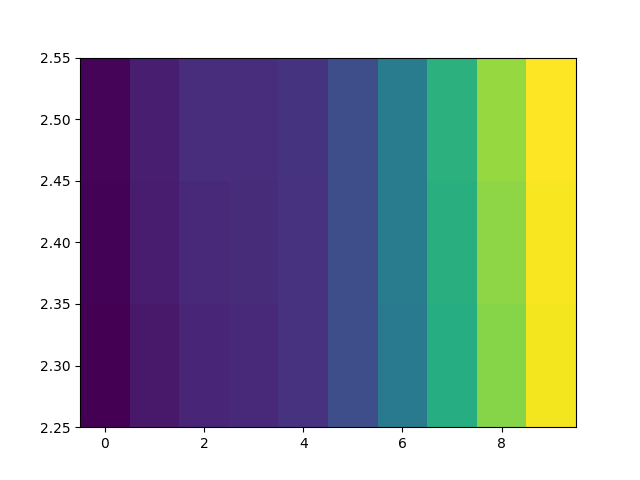

In [9]:
%matplotlib widget
x_unique = np.unique(x)
p_unique = np.unique(p)

x_grid, p_grid = np.meshgrid(x_unique, p_unique)

Z = func(x_grid, p_grid)

fig, ax = plt.subplots()
ax.pcolormesh(x_grid, p_grid, Z)





In [10]:
F = func(x,p)

In [11]:
F

array([ 6.25      , 12.50919366, 15.93310892, 16.13200005, 17.5199844 ,
       25.25672328, 40.50365314, 59.35616624, 76.43348904, 89.82574053,
        5.76      , 11.60687287, 14.99755318, 15.57285125, 17.40081763,
       25.23659618, 40.15056673, 58.54424281, 75.4587035 , 89.13380247,
        5.29      , 10.74138151, 14.10018339, 15.03652484, 17.2865148 ,
       25.21729059, 39.81189201, 57.76545911, 74.52370512, 88.47010679])

In [12]:
Z

array([[ 5.29      , 10.74138151, 14.10018339, 15.03652484, 17.2865148 ,
        25.21729059, 39.81189201, 57.76545911, 74.52370512, 88.47010679],
       [ 5.76      , 11.60687287, 14.99755318, 15.57285125, 17.40081763,
        25.23659618, 40.15056673, 58.54424281, 75.4587035 , 89.13380247],
       [ 6.25      , 12.50919366, 15.93310892, 16.13200005, 17.5199844 ,
        25.25672328, 40.50365314, 59.35616624, 76.43348904, 89.82574053]])

In [13]:
F_grid_ini = F.reshape(len(p_unique), len(x_unique))
F_grid_ini

array([[ 6.25      , 12.50919366, 15.93310892, 16.13200005, 17.5199844 ,
        25.25672328, 40.50365314, 59.35616624, 76.43348904, 89.82574053],
       [ 5.76      , 11.60687287, 14.99755318, 15.57285125, 17.40081763,
        25.23659618, 40.15056673, 58.54424281, 75.4587035 , 89.13380247],
       [ 5.29      , 10.74138151, 14.10018339, 15.03652484, 17.2865148 ,
        25.21729059, 39.81189201, 57.76545911, 74.52370512, 88.47010679]])

In [14]:
Z.shape

(3, 10)

In [15]:
F.shape

(30,)

In [16]:
np.flip(F_grid_ini, axis=0)

array([[ 5.29      , 10.74138151, 14.10018339, 15.03652484, 17.2865148 ,
        25.21729059, 39.81189201, 57.76545911, 74.52370512, 88.47010679],
       [ 5.76      , 11.60687287, 14.99755318, 15.57285125, 17.40081763,
        25.23659618, 40.15056673, 58.54424281, 75.4587035 , 89.13380247],
       [ 6.25      , 12.50919366, 15.93310892, 16.13200005, 17.5199844 ,
        25.25672328, 40.50365314, 59.35616624, 76.43348904, 89.82574053]])

In [21]:
F2_file = open("F2_values.pkl", "rb")
F2_dict = pickle.load(F2_file)
F2_x_values = F2_dict['x']
F2_p_values = F2_dict['p']
F2_values = F2_dict['F2']

print(F2_x_values)
print(F2_p_values)
sel_x = np.where(F2_x_values==0.001)

print(sel_x)

sel_p = np.where(F2_p_values[sel_x]==2.0)

print(sel_p)

print(F_values[sel_x][sel_p])

#interp_func_F2 = interpolate.RegularGridInterpolator((np.unique(F2_x_values), np.unique(F2_p_values)), F2_grid)


def calc_F(x, to_interp=False):
    """
    Returns values of function F (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """
    if not to_interp:
        def fy1(y):
            return special.kv(5.0 / 3.0, y)

        if isinstance(x, float):
            return x * integrate.quad(fy1, x, np.inf)[0]
        else:
            F_x = np.zeros(len(x))
            for i, x_i in enumerate(x):
                F_x[i] = x_i * integrate.quad(fy1, x_i, np.inf)[0]
            return F_x
    else:
        return interp_func_F(x)
    
    

def calc_F_2(x, calc_F, p, to_interp=False):
    """
    Returns values of function F2 (defined in eq. A7 of Soderberg et al. 2005)
    at x
    """
    if not to_interp:
        def fy2(y):
            return calc_F(y) * (y ** ((p - 2.0) / 2.0))

        if isinstance(x, float):
            return np.sqrt(3) * integrate.quad(fy2, 0, x)[0]
        else:
            F_2_x = np.zeros(len(x))
            for i, x_i in enumerate(x):
                if x_i < 20000:
                    F_2_x[i] = np.sqrt(3) * integrate.quad(fy2, 0, x_i)[0]
                else:
                    F_2_x[i:] = np.sqrt(3) * integrate.quad(fy2, 0, 20000)[0]
            return F_2_x
    else:
        return interp_func_F2((x,p))


print(calc_F_2(0.001, calc_F, 2.0))

[0.00e+00 1.00e-03 2.00e-03 ... 6.97e+02 6.98e+02 6.99e+02]
[2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4]
(array([1]),)
(array([], dtype=int64),)
[]
0.00027754126008685637


/tmp/ipykernel_17834/3969778464.py:32: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return x * integrate.quad(fy1, x, np.inf)[0]


In [ ]:
xg